<a href="https://colab.research.google.com/github/Sangavi-V/Epilepsy-Seizure-Determination-Combining-Brain-Heart-Signal-Analysis-And-Training-Phase2/blob/main/Epilepsy_Seizure_Determination_Combining_Brain_Heart_Signal_Analysis_And_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#here u need to have the Epileptic Seizure Recognition.csv file it has the eeg signal in various channels in this part we are adding ecg signal in last column....

# Load your EEG dataset
eeg_data = pd.read_csv('combined_dataset.csv')

# Generate synthetic ECG data
num_samples = len(eeg_data)  # Number of samples in your EEG dataset
synthetic_ecg_data = np.random.randint(-2000, 2000, num_samples)  # Adjust the range as needed

# Add the synthetic ECG data as a new column to the EEG dataset
eeg_data['ECG'] = synthetic_ecg_data

# Save the updated dataset to a new CSV file
eeg_data.to_csv('combined_dataset.csv', index=False)  # Adjust the path and filename as needed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('combined_dataset.csv')

# Load the combined EEG and ECG data with labels
X_eeg = data.iloc[:, 1:179].values
X_ecg = data['ECG'].values
y = data['y'].values - 1

# Standardize EEG and ECG data
scaler_eeg = StandardScaler()
X_eeg = scaler_eeg.fit_transform(X_eeg)

scaler_ecg = StandardScaler()
X_ecg = scaler_ecg.fit_transform(X_ecg.reshape(-1, 1))

# Combine standardized EEG and ECG data
X_combined = np.concatenate((X_eeg, X_ecg.reshape(-1, 1)), axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.33, random_state=42,
)
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,ECG
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000,-7.399739
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275,1150.672940
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000,-2000.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000,-996.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,-20.500000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000,983.250000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000,1999.000000


In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,ECG
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,-511
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,-677
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,-1219
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,1455
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,-32


In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 181 columns):
 #    Column   Non-Null Count  Dtype 
---   ------   --------------  ----- 
 0    Unnamed  11500 non-null  object
 1    X1       11500 non-null  int64 
 2    X2       11500 non-null  int64 
 3    X3       11500 non-null  int64 
 4    X4       11500 non-null  int64 
 5    X5       11500 non-null  int64 
 6    X6       11500 non-null  int64 
 7    X7       11500 non-null  int64 
 8    X8       11500 non-null  int64 
 9    X9       11500 non-null  int64 
 10   X10      11500 non-null  int64 
 11   X11      11500 non-null  int64 
 12   X12      11500 non-null  int64 
 13   X13      11500 non-null  int64 
 14   X14      11500 non-null  int64 
 15   X15      11500 non-null  int64 
 16   X16      11500 non-null  int64 
 17   X17      11500 non-null  int64 
 18   X18      11500 non-null  int64 
 19   X19      11500 non-null  int64 
 20   X20      11500 non-null  int64 
 21   X21      1

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


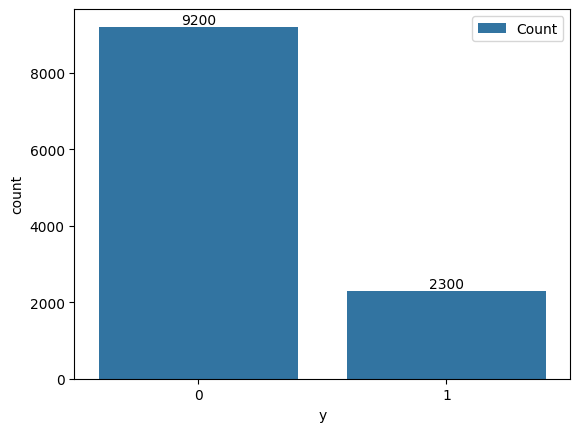

In [ ]:
def convert_label(x):
    if (x > 1):
        return 0
    else:
        return x

# apply convert function
data["y"] = data['y'].apply(convert_label)

# Load your dataset

target_column = data["y"]
# print(target_column)

ax = sns.countplot(x = target_column, label="Count")
ax.bar_label(ax.containers[0])

non_seizure, seizure = target_column.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
X = data.iloc[:, 1:179].values
print(X.shape)
print(X)

(11500, 178)
[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


In [ ]:
y = data.iloc[:, 179].values
print(y.shape)
print(y)

(11500,)
[0 1 0 ... 0 0 0]


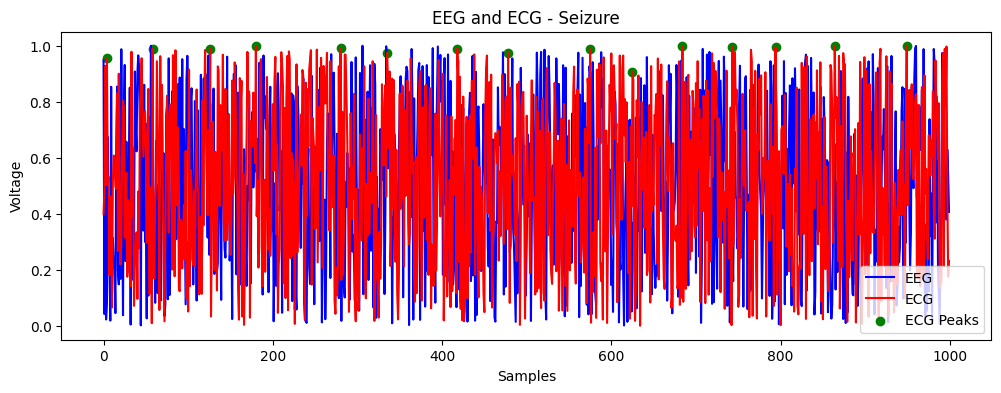

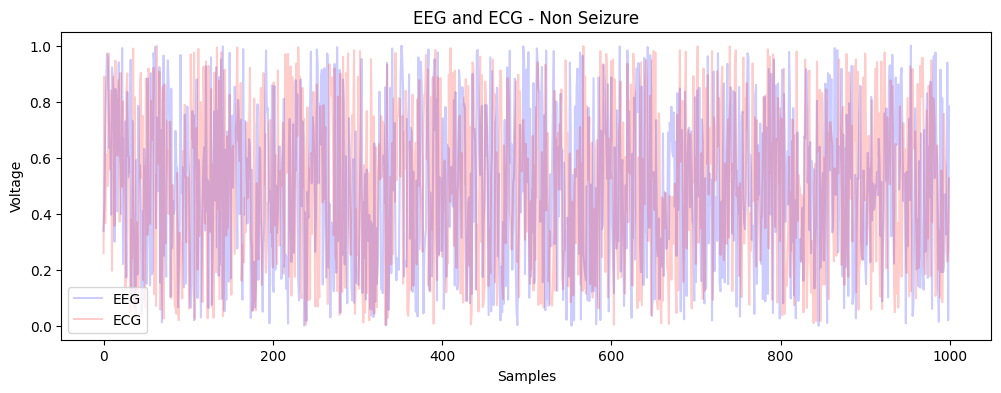

In [ ]:
from scipy.signal import find_peaks

def plot_eeg_ecg(eeg, ecg, label, peaks_ecg):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))

    if label == "Seizure":
        ax.plot(eeg, color='blue', label='EEG')
        ax.plot(ecg, color='red', label='ECG')
        ax.scatter(peaks_ecg, ecg[peaks_ecg], color='green', label='ECG Peaks')
    else:
        ax.plot(eeg, color='blue', alpha=0.2, label='EEG')
        ax.plot(ecg, color='red', alpha=0.2, label='ECG')

    ax.set_xlabel('Samples')
    ax.set_ylabel('Voltage')
    ax.set_title(f'EEG and ECG - {label}')
    ax.legend()
    plt.show()

# assuming the following arrays contain eeg and ecg data for a seizure sample
eeg_seizure = np.random.rand(1000)
ecg_seizure = np.random.rand(1000)

# finding the peaks in the ecg signal
peaks_ecg, _ = find_peaks(ecg_seizure, distance=50)

# plot the eeg and ecg for the seizure sample
plot_eeg_ecg(eeg_seizure, ecg_seizure, "Seizure", peaks_ecg)

# assuming the following arrays contain eeg and ecg data for a non-seizure sample
eeg_non_seizure = np.random.rand(1000)
ecg_non_seizure = np.random.rand(1000)

# plot the eeg and ecg for the non-seizure sample
plot_eeg_ecg(eeg_non_seizure, ecg_non_seizure, "Non Seizure", [])

In [ ]:
models = ["FFNN", "Random Forest", "XGBOOST","SVM", "Decision Tree",]
results = []

# Run a more complex FeedForward Neural Network
mlp_model = Sequential()
mlp_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(5, activation='softmax'))  # 5 classes
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data=(X_test, y_test), verbose=2)
mlp_y_pred = np.argmax(mlp_model.predict(X_test), axis=-1)
train_accuracy = mlp_model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy:', train_accuracy[1])
results.append(mlp_y_pred)

# Train Random Forest Classifier
rfc_clf = RandomForestClassifier(random_state=42)
rfc_clf.fit(X_train, y_train)
rfc_y_pred = rfc_clf.predict(X_test)
results.append(rfc_y_pred)

# Run a more complex XGBOOST
xgb_clf = XGBClassifier(
    objective="multi:softmax", num_class=5, random_state=42,
    learning_rate=0.1, n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=0.8
)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
results.append(xgb_y_pred)

# Run a more complex SVM
svm_model = SVC(C=10, kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
results.append(svm_y_pred)

# Train Decision Tree Classifier
dtc_clf = DecisionTreeClassifier(random_state=42)
dtc_clf.fit(X_train, y_train)
dtc_y_pred = dtc_clf.predict(X_test)
results.append(dtc_y_pred)

Epoch 1/500
121/121 - 2s - loss: 1.4448 - accuracy: 0.2999 - val_loss: 1.2759 - val_accuracy: 0.4308 - 2s/epoch - 18ms/step
Epoch 2/500
121/121 - 1s - loss: 1.2530 - accuracy: 0.4235 - val_loss: 1.1211 - val_accuracy: 0.5065 - 1s/epoch - 10ms/step
Epoch 3/500
121/121 - 1s - loss: 1.1360 - accuracy: 0.4912 - val_loss: 0.9701 - val_accuracy: 0.5837 - 1s/epoch - 9ms/step
Epoch 4/500
121/121 - 2s - loss: 1.0193 - accuracy: 0.5450 - val_loss: 0.8639 - val_accuracy: 0.6161 - 2s/epoch - 19ms/step
Epoch 5/500
121/121 - 2s - loss: 0.9375 - accuracy: 0.5798 - val_loss: 0.8074 - val_accuracy: 0.6385 - 2s/epoch - 19ms/step
Epoch 6/500
121/121 - 1s - loss: 0.8605 - accuracy: 0.6125 - val_loss: 0.7530 - val_accuracy: 0.6622 - 1s/epoch - 11ms/step
Epoch 7/500
121/121 - 1s - loss: 0.8303 - accuracy: 0.6217 - val_loss: 0.7361 - val_accuracy: 0.6651 - 1s/epoch - 9ms/step
Epoch 8/500
121/121 - 1s - loss: 0.7956 - accuracy: 0.6360 - val_loss: 0.7086 - val_accuracy: 0.6772 - 1s/epoch - 9ms/step
Epoch 9/500

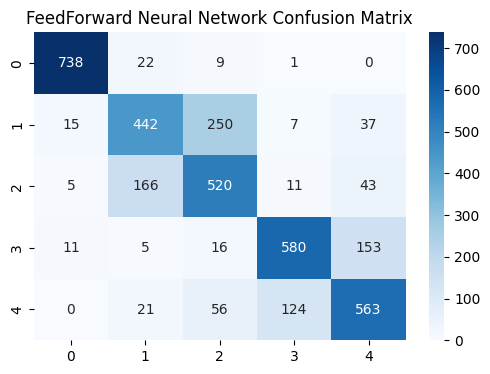

In [ ]:
# Assuming 'mlp_y_pred' contains the predictions for FeedForward Neural Network
confusion_matrix_result = confusion_matrix(y_test, mlp_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("FeedForward Neural Network Confusion Matrix")
plt.show()

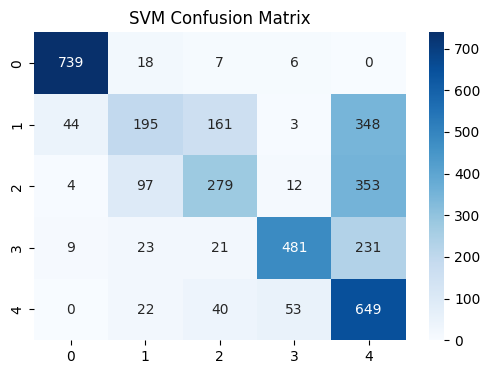

In [ ]:
# Assuming 'svm_y_pred' contains the predictions for SVM
confusion_matrix_result = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("SVM Confusion Matrix")
plt.show()

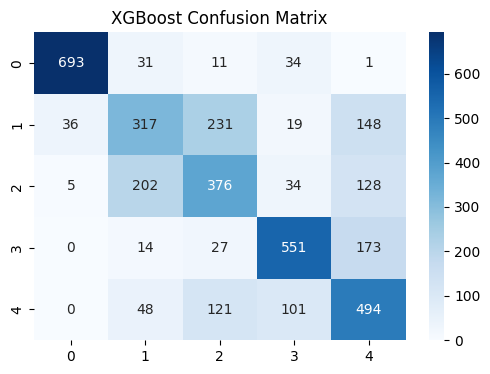

In [ ]:
# Assuming 'xgb_y_pred' contains the predictions for XGBoost
confusion_matrix_result = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("XGBoost Confusion Matrix")
plt.show()

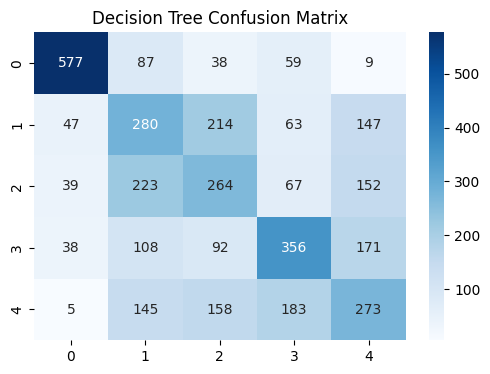

In [ ]:
# Assuming 'dtc_y_pred' contains the predictions for Decision Tree
confusion_matrix_result = confusion_matrix(y_test, dtc_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("Decision Tree Confusion Matrix")
plt.show()

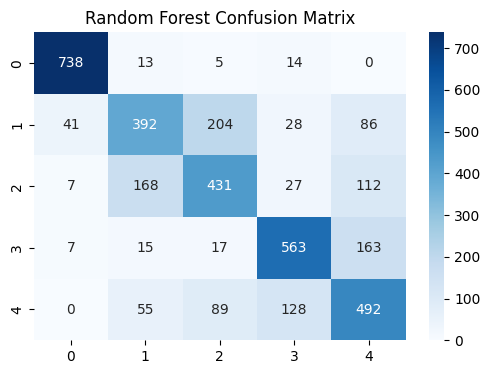

In [ ]:
# Assuming 'rfc_y_pred' contains the predictions for Random Forest
confusion_matrix_result = confusion_matrix(y_test, rfc_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4'], yticklabels=['0', '1', '2', '3', '4'])
plt.title("Random Forest Confusion Matrix")
plt.show()

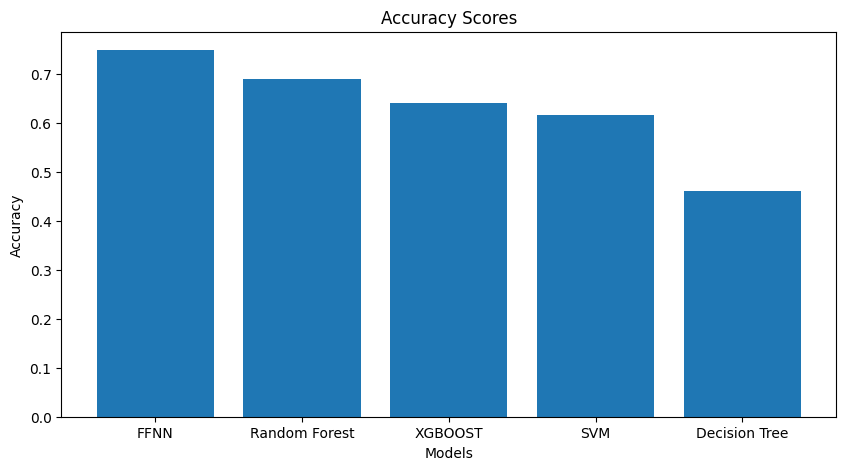

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 5))
accuracy_scores = [accuracy_score(y_test, result) for result in results]
plt.bar(models, accuracy_scores)
plt.title("Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'colors' is not defined

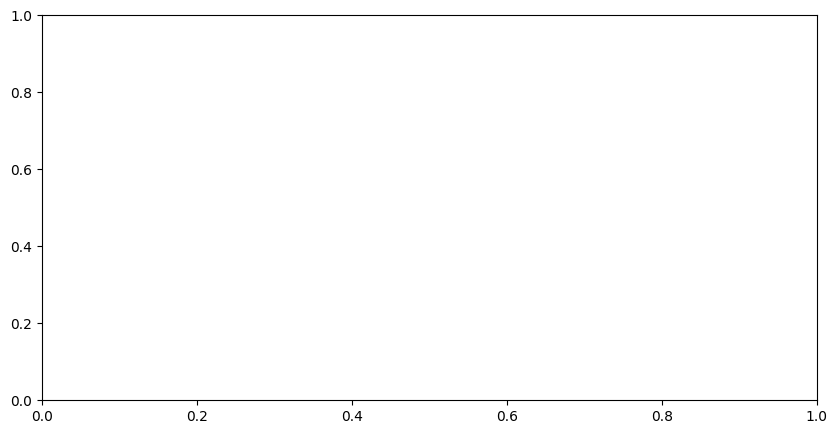

In [ ]:
import matplotlib.pyplot as plt
accuracy_scores = [accuracy_score(y_test, result) for result in results]
fig, ax = plt.subplots(figsize=(10, 5))
bars = plt.bar(models, accuracy_scores, color=colors)
for bar, acc in zip(bars, accuracy_scores):
    ax.annotate(f'{acc:.4f}', xy=(bar.get_x() + bar.get_width() / 2, acc), xytext=(0, 3),
                textcoords='offset points', ha='center', fontsize=12)
plt.title("Accuracy Scores")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
classification_reports = []

for model, result in zip(models, results):
    accuracy = accuracy_score(y_test, result)
    confusion_matrix_result = confusion_matrix(y_test, result)
    classification_report_result = classification_report(y_test, result, output_dict=True, zero_division=1)

    # Append the classification report to the list
    classification_reports.append(classification_report_result)

    print(f"{model} Accuracy: {round(accuracy * 100, 2)}%")

    # Display classification report in the desired format
    df = pd.DataFrame(classification_report_result).transpose()
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    print(f"Classification Report - {model}\n")
    print(df[['precision', 'recall', 'f1-score', 'support']])
    print("\n" + "=" * 40 + "\n")